#Assignment 1

## Spatial Domain Filter

###Import required libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.titlesize'] = 20
%matplotlib inline
matplotlib.rcParams['image.cmap'] = 'gray'

###Increase brightness and contrast

Brightness

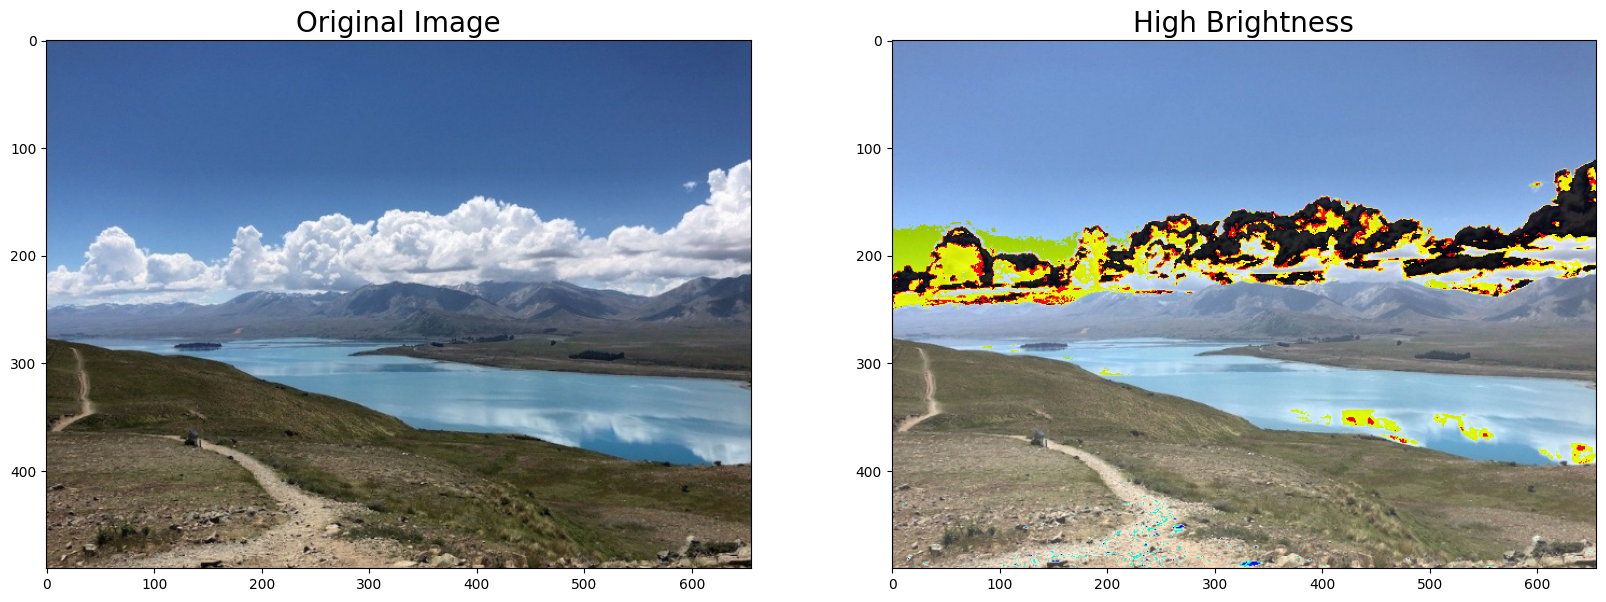

In [ ]:
img = cv2.imread("increase_brightness.jpg")
brightnessOffset = 50
brightHigh = img + brightnessOffset
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(brightHigh[...,::-1]);plt.title("High Brightness");

Contrast

In [ ]:
print("Original Image Datatype : {}".format(img.dtype))
print("Brightness Image Datatype : {}\n".format(brightHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(img.max()))
print("Brightness Image Highest Pixel Intensity : {}".format(brightHigh.max()))


Original Image Datatype : uint8
Brightness Image Datatype : uint8

Original Image Highest Pixel Intensity : 255
Brightness Image Highest Pixel Intensity : 255


Use opencv functions : to handle uint8 arithmetic or convert to higher integer types to avoid overflow

In [ ]:
# Sample 2x2 matrix of type uint8
a = np.array([[100, 110],
              [120, 130]], dtype='uint8')
print(a)

[[100 110]
 [120 130]]


imcreasing brightness with cv2

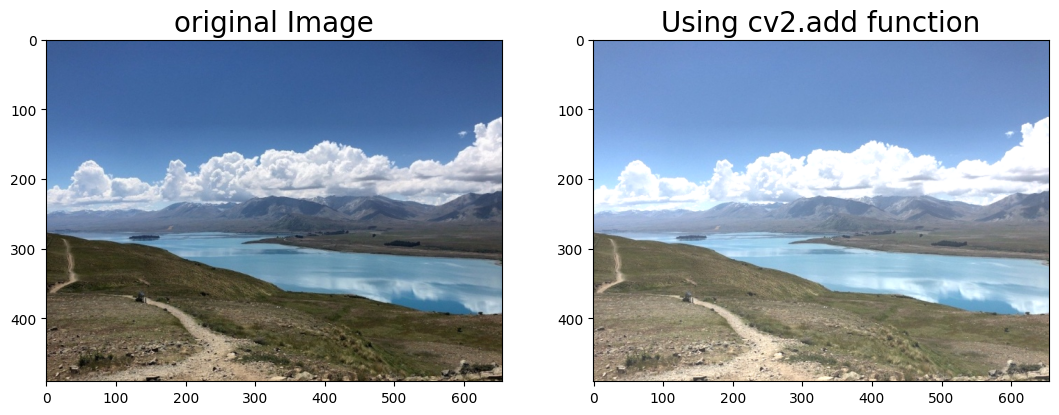

In [ ]:
brightnessOffset = 50

# Add the offset for increasing brightness
brightHighOpenCV = cv2.add(img, np.ones(img.shape,dtype='uint8')*brightnessOffset)

brightHighInt32 = np.int32(img) + brightnessOffset
brightHighInt32Clipped = np.clip(brightHighInt32,0,255)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighOpenCV[...,::-1]);plt.title("Using cv2.add function");

In [ ]:
# Add 130 so that the last element encounters overflow
print(a + 130)

[[230 240]
 [250   4]]


In [ ]:
print(cv2.add(a,130))

[[230 240]
 [250 255]]


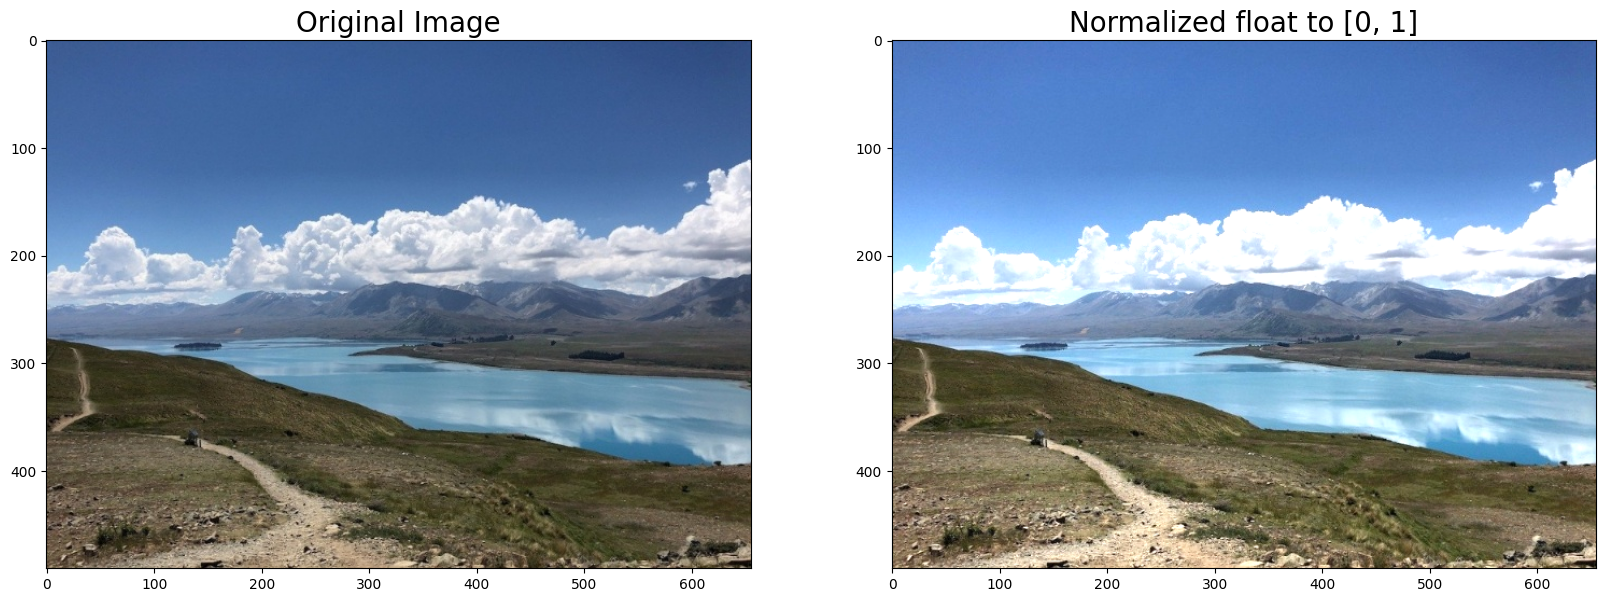

In [ ]:
contrastPercentage = 30

# Multiply with scaling factor to increase contrast
contrastHighNormalized = (img * (1+contrastPercentage/100))/255
contrastHighNormalized01Clipped = np.clip(contrastHighNormalized,0,1)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(contrastHighNormalized01Clipped[...,::-1]);plt.title("Normalized float to [0, 1]");

Together

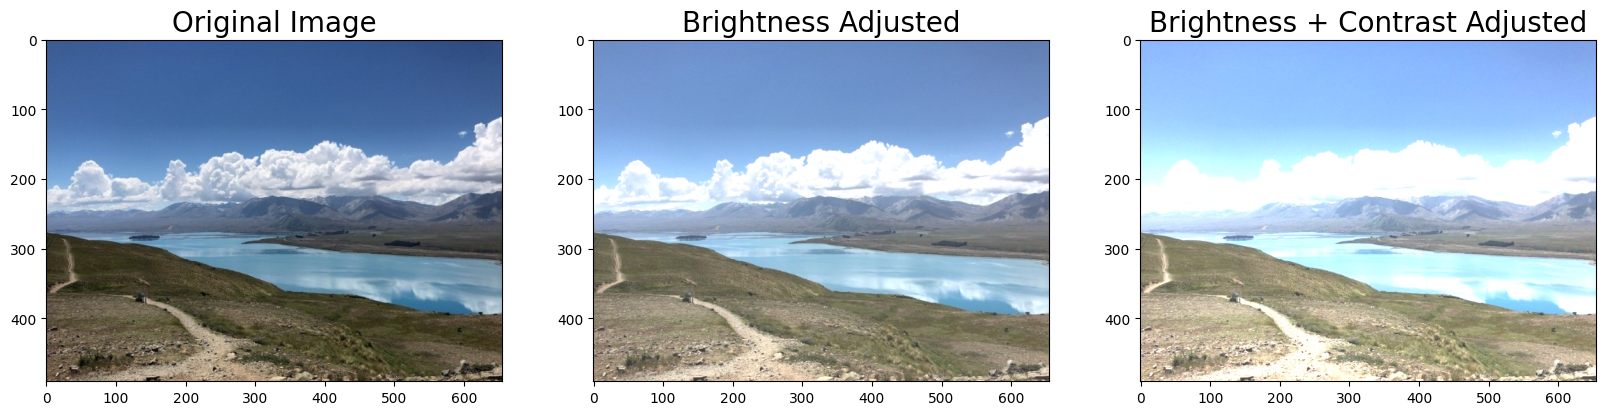

In [ ]:
brightnessOffset = 50
contrastPercentage = 30
# Brightness Adjustment using cv2.add
bright_img = cv2.add(img, np.ones(img.shape, dtype='uint8') * brightnessOffset)
contrast_img = np.float32(bright_img) * (1 + contrastPercentage / 100)
# Clip
contrast_img = np.clip(contrast_img, 0, 255).astype(np.uint8)


plt.figure(figsize=[20, 20])
plt.subplot(131); plt.imshow(img[..., ::-1]); plt.title("Original Image")
plt.subplot(132); plt.imshow(bright_img[..., ::-1]); plt.title("Brightness Adjusted")
plt.subplot(133); plt.imshow(contrast_img[..., ::-1]); plt.title("Brightness + Contrast Adjusted")
plt.show()


###Apply histogram equalization

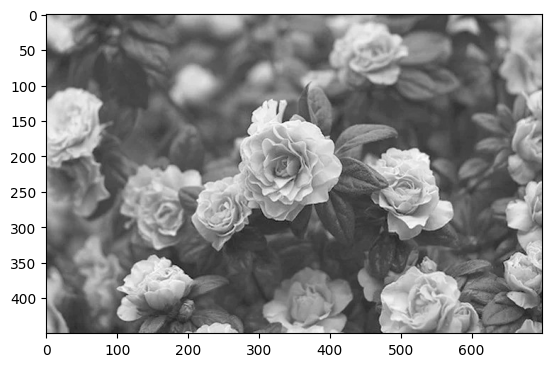

In [ ]:
img2 = cv2.imread("hist_equalization.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img2);

(-0.5, 699.5, 449.5, -0.5)

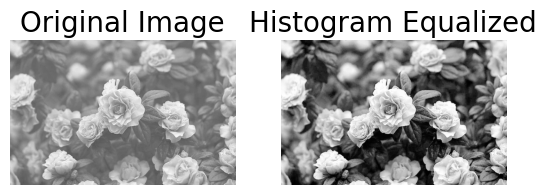

In [ ]:
# Equalize histogram
imEq = cv2.equalizeHist(img2)
#Display images
plt.figure()
ax = plt.subplot(1,2,1)
plt.imshow(img2, vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')
ax = plt.subplot(1,2,2)
plt.imshow(imEq, vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

<ipython-input-21-232d83c9744f>:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img2.ravel(),256,[0,256]);
<ipython-input-21-232d83c9744f>:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(imEq.ravel(),256,[0,256]);


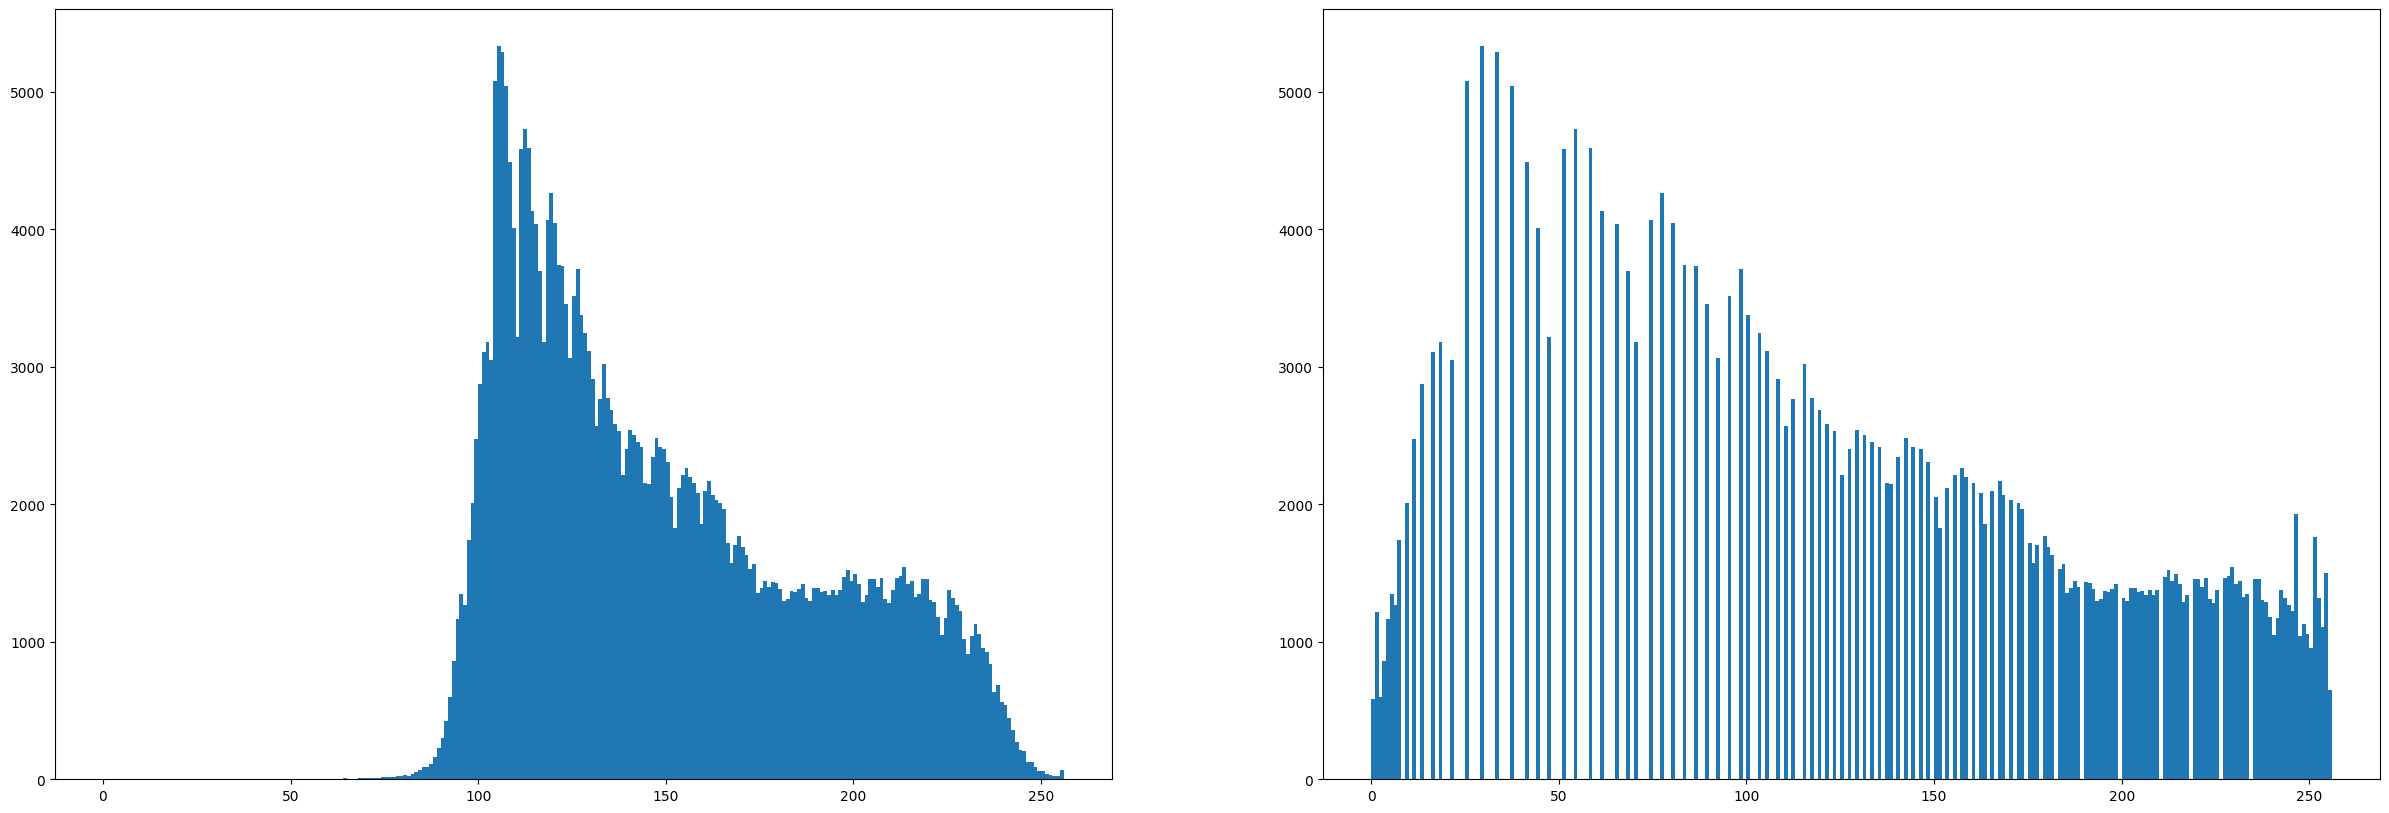

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.hist(img2.ravel(),256,[0,256]);

plt.subplot(1,2,2)
plt.hist(imEq.ravel(),256,[0,256]);
plt.show()

###Apply histogram equalization and Contrast Limited Adaptive Histogram Equalization (CLAHE) and compare results

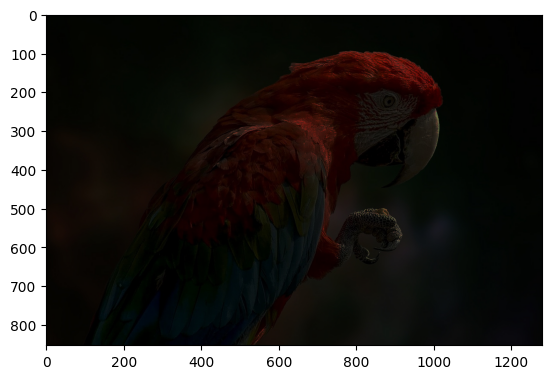

In [ ]:
img3 = cv2.imread("histogram _equalized.jpg", cv2.IMREAD_COLOR)
plt.imshow(img[...,::-1]);

Histogram Equalization for Color Images

(-0.5, 1279.5, 852.5, -0.5)

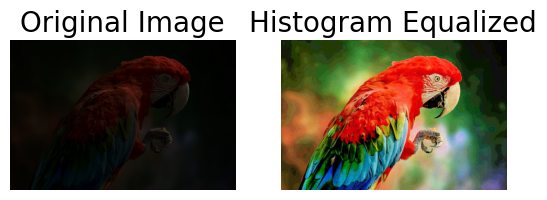

In [ ]:
# Convert to HSV
imhsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

# Perform histogram equalization only on the V channel
imhsv[:,:,2] = cv2.equalizeHist(imhsv[:,:,2])

# Convert back to BGR format
imEq = cv2.cvtColor(imhsv, cv2.COLOR_HSV2BGR)

#Display images
plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(img3[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

 Contrast Limited Adaptive Histogram Equalization (CLAHE) :improves the local contrast. More importantly it allows us to specify the size of the neighborhood that is considered "local".

(-0.5, 1279.5, 852.5, -0.5)

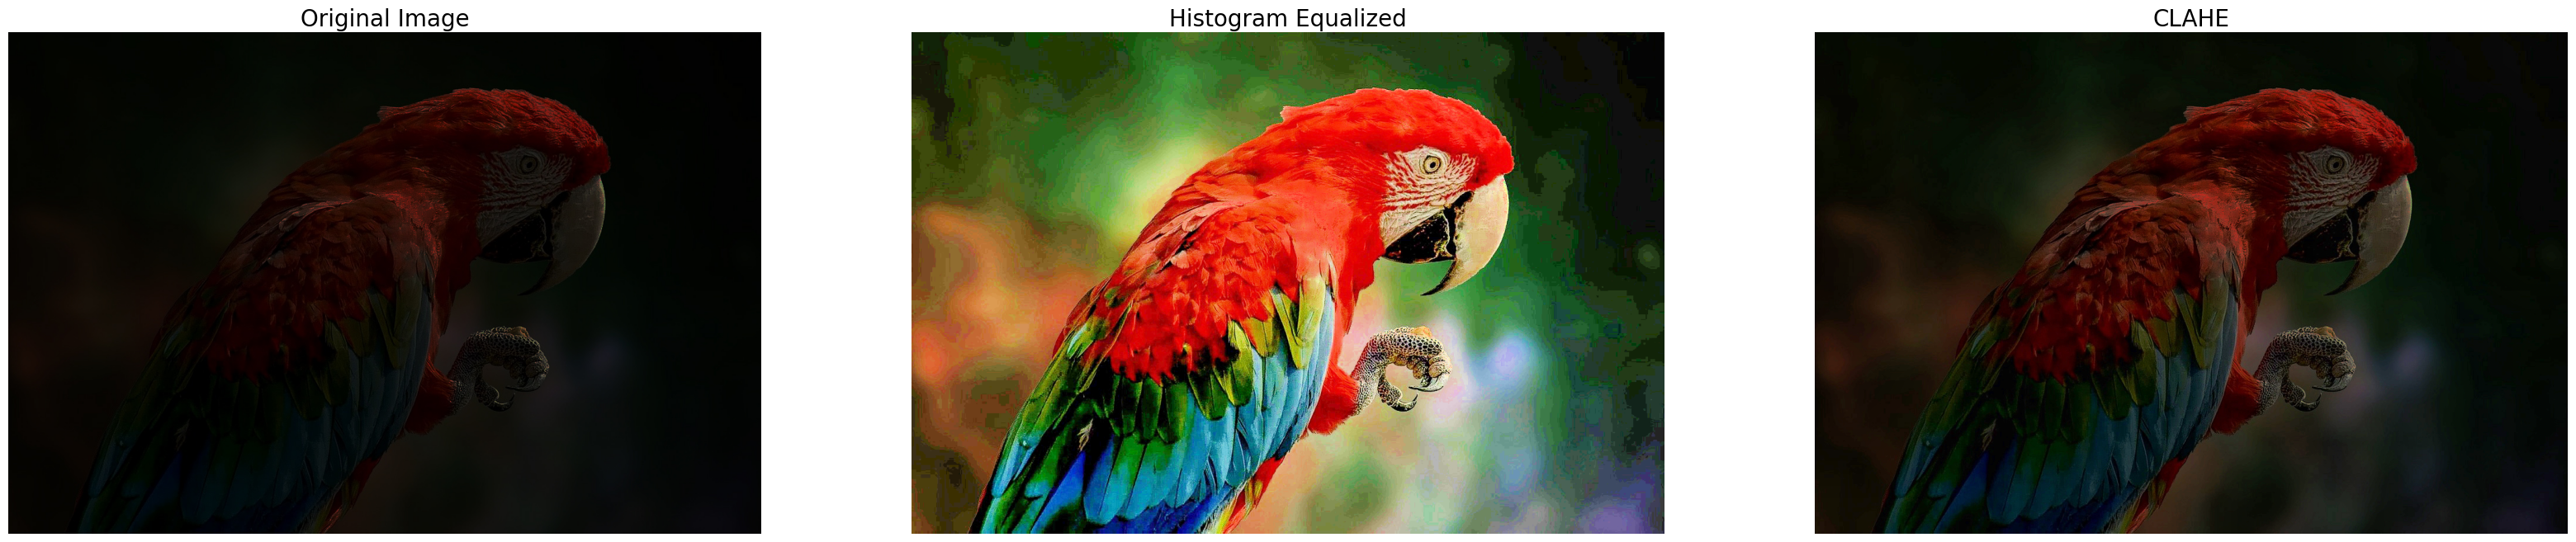

In [ ]:
# Convert to HSV
imhsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
imhsvCLAHE = imhsv.copy()

# Perform histogram equalization only on the V channel
imhsv[:,:,2] = cv2.equalizeHist(imhsv[:,:,2])

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imhsvCLAHE[:,:,2] = clahe.apply(imhsvCLAHE[:,:,2])

# Convert back to BGR format
imEq = cv2.cvtColor(imhsv, cv2.COLOR_HSV2BGR)
imEqCLAHE = cv2.cvtColor(imhsvCLAHE, cv2.COLOR_HSV2BGR)

#Display images
plt.figure(figsize=(40,40))

ax = plt.subplot(1,3,1)
plt.imshow(img3[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,3,2)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

ax = plt.subplot(1,3,3)
plt.imshow(imEqCLAHE[:,:,::-1], vmin=0, vmax=255)
ax.set_title("CLAHE")
ax.axis('off')

###Apply gaussian filter with different kernel size and compare

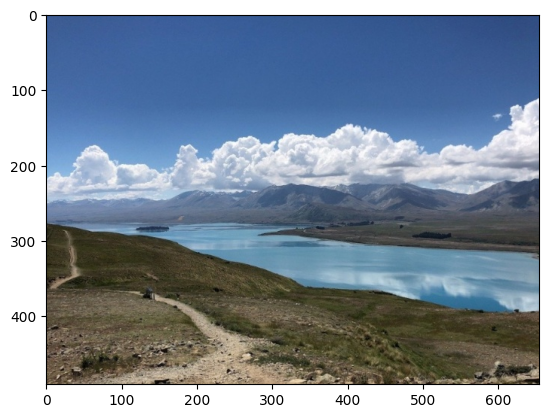

In [ ]:
img4 = cv2.imread("increase_brightness.jpg")
plt.imshow(img[...,::-1]);


In [ ]:
# Apply gaussian blur
dst1=cv2.GaussianBlur(img4,(5,5),0,0)
dst2=cv2.GaussianBlur(img4,(25,25),50,50)
# Display images
combined = np.hstack((img4, dst1,dst2))

Text(0.5, 1.0, 'Gaussian Blur Result 2 : KernelSize = 25')

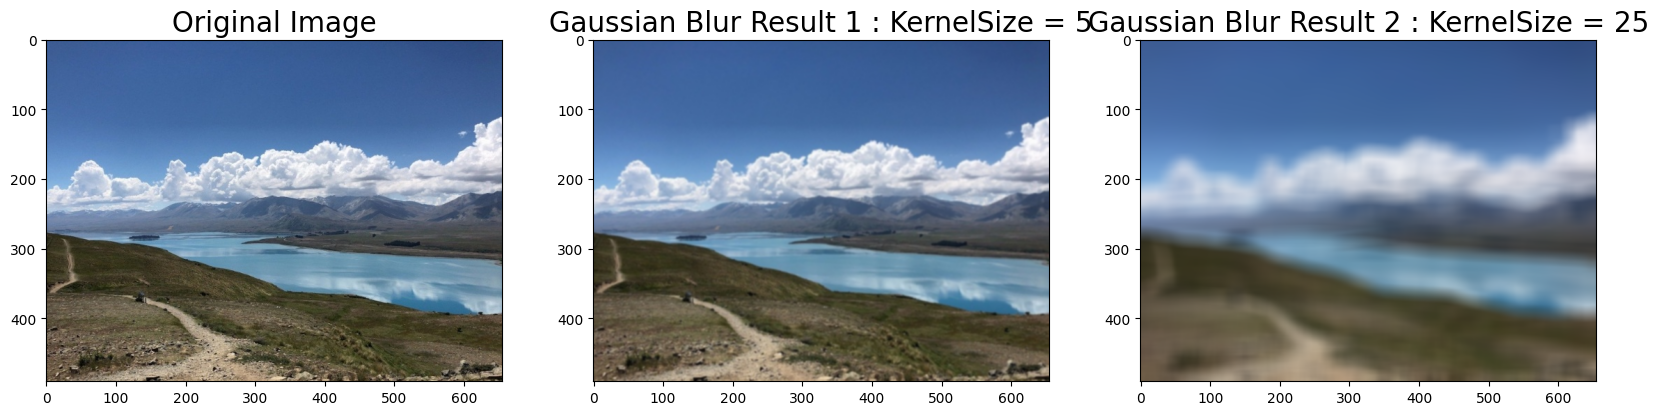

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(dst1[...,::-1]);plt.title("Gaussian Blur Result 1 : KernelSize = 5")
plt.subplot(133);plt.imshow(dst2[...,::-1]);plt.title("Gaussian Blur Result 2 : KernelSize = 25")

Apply median filter

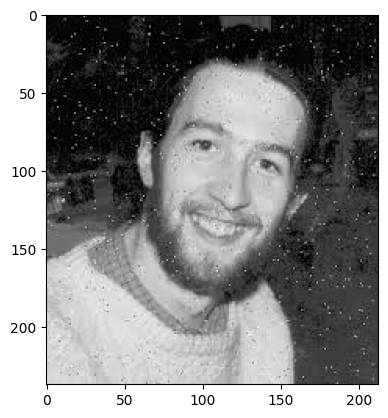

In [ ]:
img5 = cv2.imread("/content/images (8).jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img5);

Text(0.5, 1.0, 'Median Blur Result : KernelSize = 5')

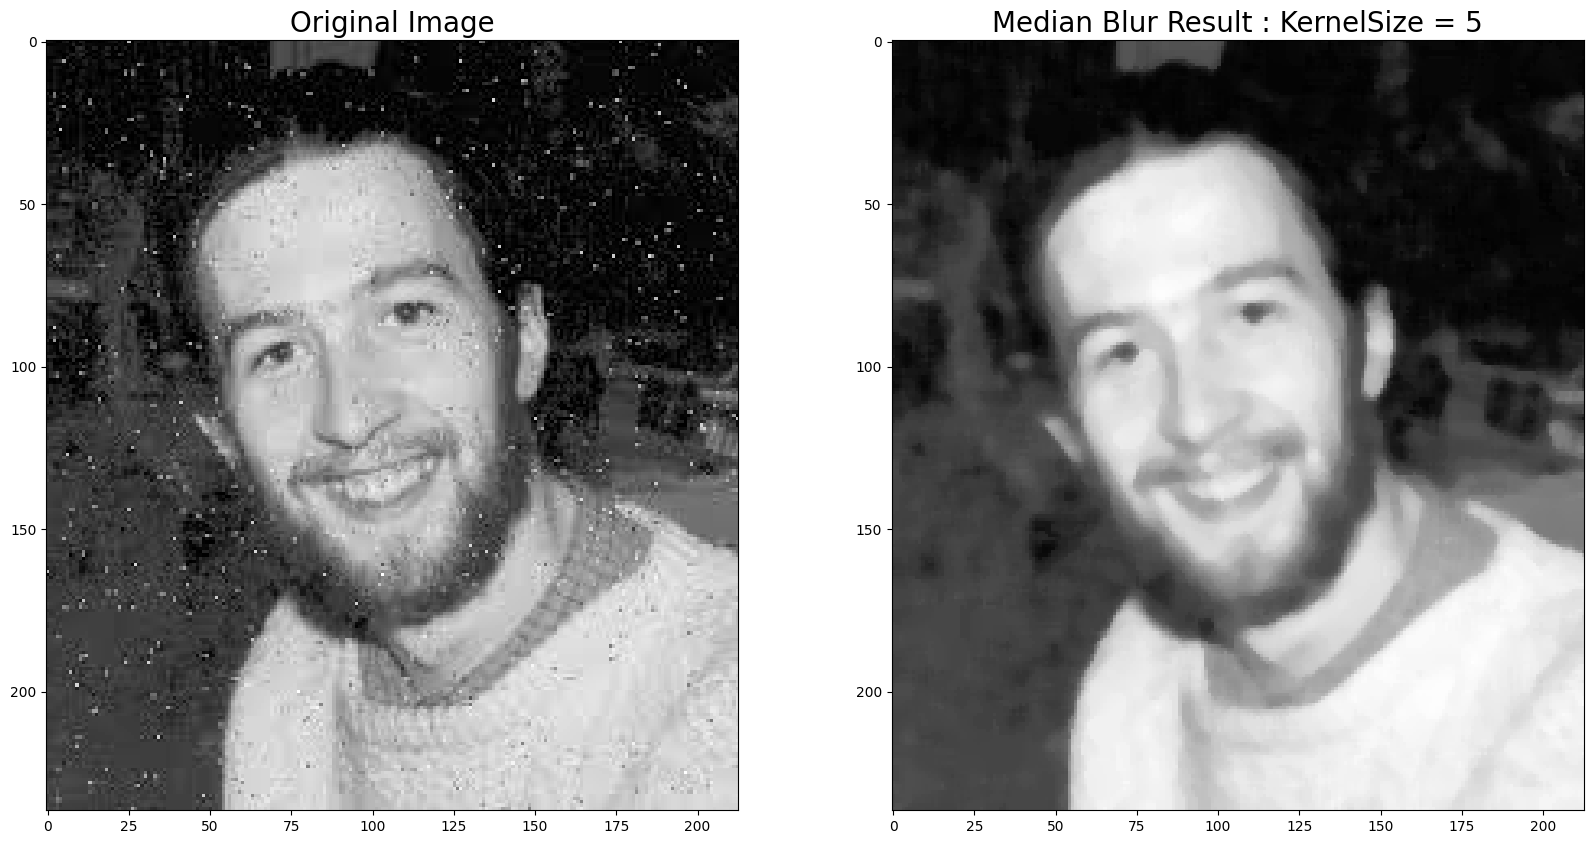

In [ ]:
# Defining the kernel size
kernelSize = 5
# Performing Median Blurring
medianBlurred = cv2.medianBlur(img5,kernelSize)

# Display the original and median blurred image
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img5[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(medianBlurred[...,::-1]);plt.title("Median Blur Result : KernelSize = 5")

Apply sharpening filter

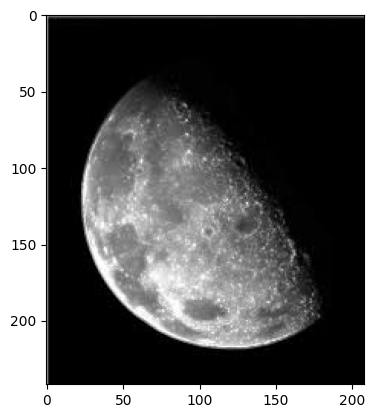

In [ ]:
img6 = cv2.imread("sharp_filter.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img6);

In [ ]:
#Sharpen kernel
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

Text(0.5, 1.0, 'Sharpening Result')

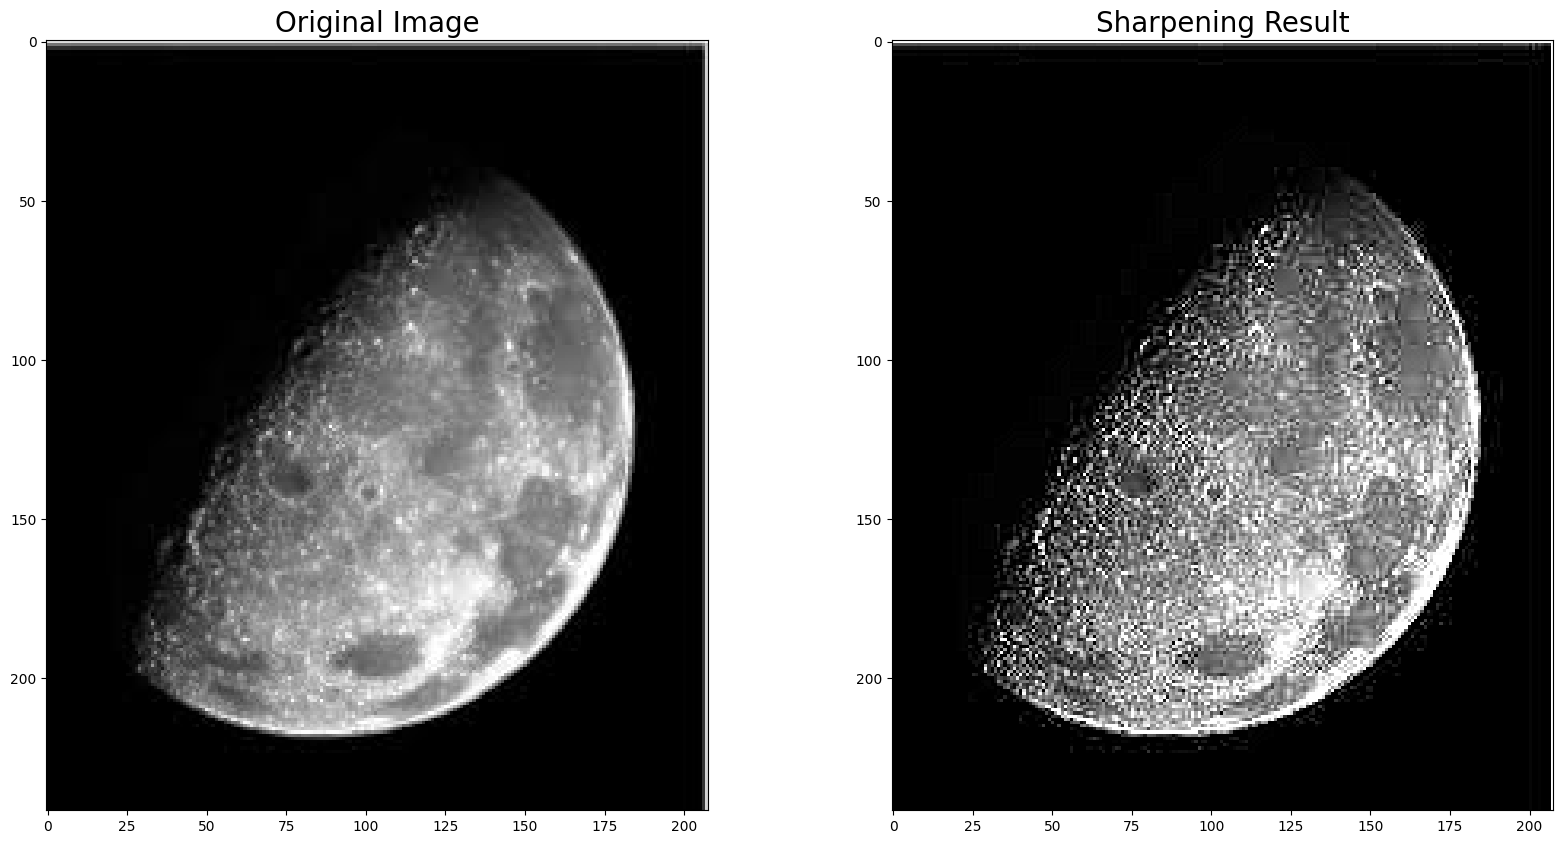

In [ ]:
# Using 2D filter by applying the sharpening kernel
sharpenOutput = cv2.filter2D(img6, -1, sharpen)

plt.figure(figsize=[20,10])

plt.subplot(121);plt.imshow(img6[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(sharpenOutput[...,::-1]);plt.title("Sharpening Result")

In [ ]:
# # Using 2D filter by applying the sharpening kernel
# sharpenOutput = cv2.filter2D(img6, -1, sharpen)

# plt.figure(figsize=[20,10])
# plt.subplot(121);plt.imshow(img6, cmap='gray');plt.title("Original Image")
# plt.subplot(122);plt.imshow(img6, cmap='gray');plt.title("Sharpening Result")

###Apply Adaptive thresholding and global thresholding and compare with results

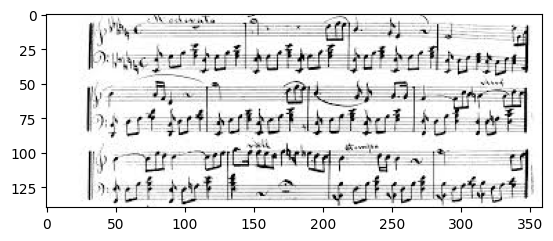

In [ ]:
img7 = cv2.imread("Threshold.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img7);

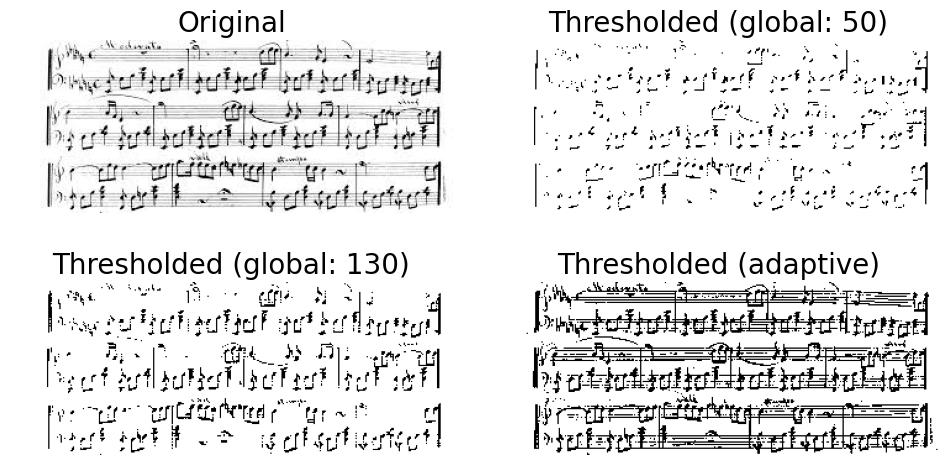

In [64]:
retval, img_thresh_gl_1 = cv2.threshold(img7, 50, 255, cv2.THRESH_BINARY)
retval, img_thresh_gl_2 = cv2.threshold(img7, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img7, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)

# Adjust figure size
plt.figure(figsize=(12, 6))

# spacing
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.subplot(221); plt.imshow(img7, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(222); plt.imshow(img_thresh_gl_1, cmap='gray'); plt.title("Thresholded (global: 50)"); plt.axis('off')
plt.subplot(223); plt.imshow(img_thresh_gl_2, cmap='gray'); plt.title("Thresholded (global: 130)"); plt.axis('off')
plt.subplot(224); plt.imshow(img_thresh_adp, cmap='gray'); plt.title("Thresholded (adaptive)"); plt.axis('off')

plt.show()
